# Seattle AirBNB Data

# **Table of Contents**
1. [Introduction](#intro)
1. [Business Understanding](#business)
1. [Analisys Data](#EDA)
    1. [Are neighborhoods important in get better housing?](#housing)
    1. [What is the evolution of the different types in Airbnb in Seatle?](#evolution)
    1. [What is the season of the year which it is more occupied?](#season)
1. [Data Preparation](#prepare)
1. [Model Data](#model)
1. [Conclusion](#conclusion)

## **Introduction**
<a id="intro"></a>

<img src="https://www.visittheusa.co/sites/default/files/styles/hero_m_1300x700/public/images/hero_media_image/2017-03/f3d1f001ce1e4f874adc9a88fd9fb095.jpeg?itok=DHjISMr_">

Since 2018, guests and hosts have used Airbnb to travel in a more unique, cheaper and personalized way, so improve the tourism. Airbnb is a company, which offer a software plataform, which permit to people public rent of their houses or properties to other people. These rents are very famous because is cheaper than hotel or motel and best quality/price services.


As part of the Airbnb Inside initiative, this dataset describes the listing activity of Homestays in Seattle, WA and to try get important information to understand this business and know the position of Seattle in Airbnb.  

## **Business Understanding**
<a id="business"></a>

I take a look of data, I want respond to these three questions, which are very interesting to understand the situation of Airbnb in Seattle. This question is:


1. Are neighborhoods important in get better housing?
1. What is the evolution of the different types in Airbnb in Seattle?
1. How well can we predict a housing cost? What aspects correlate well to cost?

## **Analisys Data**
<a id="EDA"></a>

To begin with Analisys Data, I need import these libraries and show the different CSVs which we have to access and answer all preview the questions.

In [1]:
import numpy as np
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

First, we are going to read all files and get the description of data.

In [2]:
calendar=pd.read_csv("calendar.csv")
listings=pd.read_csv("listings.csv")
reviews=pd.read_csv("reviews.csv")
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


This file has 4 columns, which are:
* **listing_id** : It is the id of each house of airbnb.
* **date** : It is the date, which show is available or no, and their cost.
* **avaible** : It is showing if the house was available.
* **price** : It is the cost of house in this date.

So this data have all information about the rent each house.

In [51]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


This file have 92 columns, i can't describe all columns, so when I answer the question describe the columns that I will use to answer. The important is that this data have all the information about each house.

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This file have 6 columns, which are:
* **listing_id** : It is the id of each house of airbnb.
* **id** : It is the id of each review of airbnb.
* **date** : It is the date, which was done the rewiews.
* **reviewer_id** : It is the id of each reviewer.
* **reviewer_name** : It is the name of each reviewer.
* **comments** : It is the comments of each review.

So this data have all information about the reviews each house.

### **Are neighborhoods important in get better housing?**
<a id="housing"></a>

To respond this question, We need get the percentage of occupied houses group by neighbourhood, which I have used the dataframe **calendar**, where I can see the all number of busy each date. Therefore I have divided the number of occupied houses by the total each date.

I use the column **neighbourhood_group_cleansed**, which show neighbourhoods group each house. So, I have merge two data frames, which are **calenda**r and **listing**.


The final dataframe get the relation each percentage of occupated houses each neighbourhoods group.

In [30]:
data=calendar[calendar["available"]=="f"].listing_id.value_counts()
left=data.to_frame()
left = data.reset_index()
data=calendar[["listing_id","available"]].listing_id.value_counts()
rigth=data.to_frame()
rigth = data.reset_index()
data_full = pd.merge(left, rigth, on='index')
data_full.columns=["id","Number_occupaded","Number"]
data_full["Number_occupaded"]=data_full.Number_occupaded/data_full.Number
data_full=data_full.drop(labels="Number",axis=1)

left=data_full.copy()
right=listings[["id","neighbourhood_group_cleansed"]]
data_full = pd.merge(left, right, on='id')
data=data_full.groupby("neighbourhood_group_cleansed").mean().drop(labels=["id"],axis=1)

We can see that distribution of busy house is very changeable but we get the minimum number_occupaded and the maximun.

I want get this minimun to study the reviews about this house and try get some important information and answer the question which is, Why this neighbourhood is the least visited?

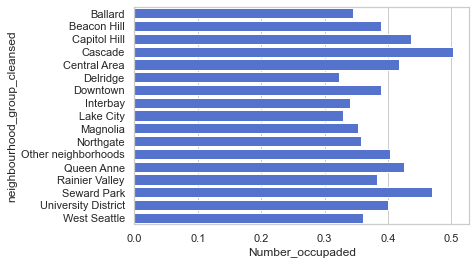

In [33]:
data=data.reset_index()
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=data.Number_occupaded, y=data.neighbourhood_group_cleansed, data=tips,color ="royalblue")

I have gotten the reviews and filter about this neighbourhood, for this I had to merge the dataframes **reviews** and **listings**. This merge was filtered by **neighbourhood_group_cleansed** was equal to "Delridge". Therefore we got a dataframe with the reviews of the neighbourhood Delridge.

So, we will can see the bad points of the houses in the worse neighbourhood.

In [6]:
neighborhoods = ["Delridge"]
review_scores_location
data_filter=data_full[data_full.neighbourhood_group_cleansed.isin(neighborhoods)].copy()
left=reviews[["listing_id","comments"]]
data_filter.columns=["listing_id","Number_occupaded","neighbourhood"]
data_merge = pd.merge(left, data_filter, on='listing_id')
data_merge=data_merge.dropna()

I got the reviews houses of the houses which have less than half the occupancy rate and I merge all these reviews in a text.

In [7]:
data_merge['Number_occupaded'].quantile([0.5], interpolation='nearest')

0.5    0.153425
Name: Number_occupaded, dtype: float64

In [8]:
reviews_1quart=data_merge[(data_merge.Number_occupaded <0.153425) & (data_merge.neighbourhood == 'Delridge')]
texts_1quart = " ".join(review for review in reviews_1quart.comments)

I have done two functions, the function call **get_neg_pos_word**, take a text which have all reviews of a neighbourhood and return the positives words and negative words, and the second function call **create_wordcloud**, take a list words and created a wordcloud about the words more used.

In [9]:
def get_neg_pos_word(text):
    
    test_subset=text.split(" ")

    sid = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]

    for word in test_subset:
        if (sid.polarity_scores(word)['compound']) >= 0.5:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            neg_word_list.append(word)
    return pos_word_list,neg_word_list

def create_wordcloud(text):
    # Create stopword list:
    textmax = " ".join(review for review in text)
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(textmax)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

I have generated a wordcloud, which include the negative words more used, so we can see this information:

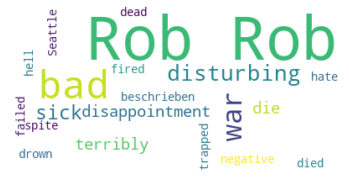

In [10]:
positive,negative=get_neg_pos_word(texts_1quart)
create_wordcloud(negative)

I get some reasons that this neighbourhood isn't popular.
* The word most remarkable is Rob, so the worst of these house was that the guests were robben.
* These houses should be bad or very ugly, this adjetive are very bad for example terribly, disappointment, failed,spite,etc.
* Some words are very strange for example war, died or disturbing, I susposse that the neighbourhood is very conflicting.

These reasons are that these neighbourhood aren't as busy than the rest neighbourhood, and Airbnb should cancell these bad host and get better houses, so they will can improve the percentage busy houses in this neighbourhood.

### **What is the evolution of the different types in Airbnb in Seatle?**
<a id="evolution"></a>

To respond this question, I had ned merge the dataframes **calendar** and **listing** by listing id. The information that I want get is the number of busy house group by date and the room type.

Finally plot a line graph by room type and show the evolution of each room type versus date.

In [13]:
data=calendar[calendar["available"]=="f"].drop(labels=["price","available"],axis=1)
data.columns=["id","date"]
right=listings[["id","room_type"]]
data_full = pd.merge(data, right, on='id')
data_full=data_full.dropna()
data_full=data_full.groupby(["date","room_type"]).count()
data_full=data_full.reset_index()

I got split the different dataframe and plot a line by each type room.

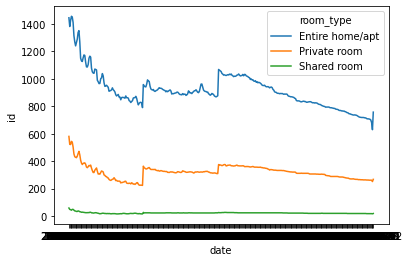

In [14]:
ax = sns.lineplot(x="date", y="id", hue="room_type",data=data_full,markers=True, dashes=False,)

This graph show that in generally all house decrement the number of busy house independent of type room, but the best room type is home and the second is private room.

The important information is that the shared room is failure, so airbnb will should put less shared rooms and improve the home type room. In another hand, this graph show that the busy houses have a cicle, which start down and suddenly have got a strong up.

Surely these peaks are because a large number of tourists go to that specific season.

## **Data Preparation**
<a id="prepare"></a>

I am going to answer the last question, which was: 
* How well can we predict an housing of cost? What aspects correlate well to cost?


To respond this question, I need prepare the data and create a model, which will try predict the price of each house.
First, I should choose columns, which are using to the model, I can't use all columns because the number of features is very high. So I catch the important columns and I avoid the columns that they have high nulls values and not important values.

In [4]:
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

I choose 16 features, which should be important to predict the price, and then I will describe this columns.
The rest of features, I didn't take because are features with very category values or they didn't make sense in this model.

In [39]:
columns=["neighbourhood_group_cleansed","room_type","accommodates","bathrooms","bedrooms","beds","price","guests_included","minimum_nights","availability_30","availability_60","availability_90","availability_365","number_of_reviews","review_scores_value","cancellation_policy"]
data=listings[columns].copy()
data.describe(include = 'all')

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_value,cancellation_policy
count,3818,3818,3818.000000,3802.000000,3812.000000,3817.000000,3818,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3162.000000,3818
unique,17,3,NaN,NaN,NaN,NaN,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Other neighborhoods,Entire home/apt,NaN,NaN,NaN,NaN,$150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict
freq,794,2541,NaN,NaN,NaN,NaN,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1417
mean,NaN,NaN,3.349398,1.259469,1.307712,1.735394,NaN,1.672603,2.369303,16.786276,36.814825,58.082504,244.772656,22.223415,9.452245,NaN
std,NaN,NaN,1.977599,0.590369,0.883395,1.139480,NaN,1.311040,16.305902,12.173637,23.337541,34.063845,126.772526,37.730892,0.750259,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
25%,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,2.000000,13.000000,28.000000,124.000000,2.000000,9.000000,NaN
50%,NaN,NaN,3.000000,1.000000,1.000000,1.000000,NaN,1.000000,2.000000,20.000000,46.000000,73.000000,308.000000,9.000000,10.000000,NaN
75%,NaN,NaN,4.000000,1.000000,2.000000,2.000000,NaN,2.000000,2.000000,30.000000,59.000000,89.000000,360.000000,26.000000,10.000000,NaN


I have chosen this columns and I will describe them:
* **neighbourhood_group_cleansed :** this feature is category have 17 unique values and the most popular value is 'Other neghborhoods', the meaning of this feature is know the neghborhoods where is the house.
* **room_type :** this feature is category have 3 unique values and the most popular value is 'Entire home/apt', the meaning of this feature is know the room type of the house.
* **bathrooms :** this feature is quantitative the tipical value is 1 bathroom and the max value is 8, the meaning of this feature is know the number bathrooms in each house.
* **accommodates :** this feature is quantitative the tipical value is 3 accommodates and the max value is 16, the meaning of this feature is know the number accommodates in each house.
* **bedrooms :** this feature is quantitative the tipical value is between 1 or 2 bedrooms and the max value is 7, the meaning of this feature is know the number bedrooms in each house.
* **beds :** this feature is quantitative the tipical value is between 1 or 2 beds and the max value is 15, the meaning of this feature is know the number beds and the tipycal is one bed per bedroom.
* **price :** this feature is category because this values have the symbol of dolar, and it is the values which I want to predict, so I will transform these values to numeric. The top value is 150 dolars.
* **guests_included :** this feature is quantitative the tipical value is between 1 or 2 guests and the max value is 15, the meaning of this feature is know the number guests should be  more or less the same to the beds.
* **minimum_nights :** this feature is quantitative the tipical value is 2 nights and the max value is 1000, the meaning of this feature is know the number night, which you can stay in each house.
* **availability_30 :** this feature is quantitative the tipical value is 20 days and the max value is 30, the meaning of this feature is know the number days, that you can rent.
* **availability_60 :** this feature is quantitative the tipical value is 46 and the max value is 60, the meaning of this feature is know the number days, that you can rent.
* **availability_90 :** this feature is quantitative the tipical value is 73 days and the max value is 90, the meaning of this feature is know the number days, that you can rent.
* **availability_365 :** this feature is quantitative the tipical value is 308 and the max value is 365, the meaning of this feature is know the number days, that you can rent.
* **number_of_reviews :** this feature is quantitative the tipical value is between 2 and 9 reviews and the max value is 474, the meaning of this feature is know the number reviews of each house.
* **review_scores_value :** this feature is quantitative the tipical value is 93 scores and the max value is 100, the meaning of this feature is know the score value of each house.
* **cancellation_policy :** this feature is category have 3 unique values and the most popular value is 'strict', the meaning of this feature is know the cancellation policy of each house.

Finally I should clean data, so I create a function which return one dataframe X with clean data and the response vector y (**price**). The cleanup process are the next:
1. Drop all the rows with no price
1. Transform the values of price to float
1. Create X as all the columns that are not the price column
1. Create y as the price column
1. For each numeric variable in X, fill the column with the mean value of the column.
1. Create dummy columns for all the categorical variables in X, drop the original columns.
1. Finally return the dataframe X and the vector y

In [34]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no price
    2. Transform the values of price to float
    3. Create X as all the columns that are not the price column
    4. Create y as the price column
    5. Drop the price columns from X
    6. For each numeric variable in X, fill the column with the mean value of the column.
    7. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df=df.dropna(subset=["price"],axis=0)
    RX = re.compile('([,$])')
    to_number=lambda value: float(RX.sub(r'', value))
    df["price"]=df["price"].apply(to_number)
    X=df.drop(labels=["price"],axis=1)
    y=df["price"]
    num_vars = X.select_dtypes(exclude=['object']).columns
    media=lambda column: column.fillna(column.mean())
    X[num_vars]=X[num_vars].apply(media,axis=0)
    cat_df = X.select_dtypes(include=['object']).copy().columns
    for columna in cat_df:
        X = pd.concat([X, pd.get_dummies(X[columna], prefix=columna,prefix_sep='_', drop_first=True)], axis=1)
    X=X.drop(labels=cat_df, axis=1)
    return X, y    

I execute the preview function with el dataframe filtered listings and I get the dataframe X and the vector Y

In [35]:
X, y = clean_data(data)

## **Model Data**
<a id="model"></a>

I split these data in train and test, I create the lineal regression model and I fit it with the data train.
Also I will create one function call **coeff_weights**, which take the coefs model and this function return the weights of each columns and I can know relevance them with the predict column (**price**).

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [37]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(40)

,est_int,coefs,abs_coefs
30,room_type_Shared room,-71.642328,71.642328
17,neighbourhood_group_cleansed_Downtown,39.752544,39.752544
29,room_type_Private room,-33.507827,33.507827
14,neighbourhood_group_cleansed_Cascade,32.679872,32.679872
2,bedrooms,30.753654,30.753654
20,neighbourhood_group_cleansed_Magnolia,29.792736,29.792736
1,bathrooms,29.735429,29.735429
23,neighbourhood_group_cleansed_Queen Anne,29.296994,29.296994
21,neighbourhood_group_cleansed_Northgate,-27.290597,27.290597
13,neighbourhood_group_cleansed_Capitol Hill,24.567070,24.567070


This result show me, what columns are the best to predict price of each house, so the most important column is room_type because the shared room influence of the price, it is normal, inasmuch as if you take the shared room should be cheaper than room private.

In [38]:
predict_training=lm_model.predict(X_train)
predict_test=lm_model.predict(X_test)
test_score=r2_score(y_test, predict_test)
train_score=r2_score(y_train, predict_training)
print("the train score is {} and the test score is {}".format(train_score,test_score))

the train score is 0.5625961922574327 and the test score is 0.5887665548429821


I have gotten the good score beacuse the test score is better than train score, the normal is back to front, so my model haven't got overfitting.
These results are very clear, and I want to improve the test score and train score, so I go to quit the 10 latest values of weight dataframe for example guests_included, accommodates and cancellation_policy.

In [38]:
X.shape

(3818, 32)

In [43]:
delete=(coef_df['est_int'][-10:].values).tolist()
columns=(coef_df['est_int'].values).tolist()
for i in delete:
    columns.remove(i)
X=X[columns]
X.shape

(3818, 22)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
predict_training=lm_model.predict(X_train)
predict_test=lm_model.predict(X_test)
test_score=r2_score(y_test, predict_test)
train_score=r2_score(y_train, predict_training)
print("the train score is {} and the test score is {}".format(train_score,test_score))

the train score is 0.5569113290818946 and the test score is 0.581667456102124


Drop these columns no improve the score, so I'll leave the model as before,but thanks to dataframe coef_weights, i can respond to this question : 
* What aspects correlate well to cost?

The answer is that when one person to rent one house,the cost of the rent will depend on the type of room, the neighborhood in which the house is located and the number of rooms and bathrooms.

## **Conclusion**
<a id="conclusion"></a>

In this part, I go to summarize all concepts which I have can get of the questions that I put me.
To begin with, I will summarize all the questions I asked myself and their corresponding answers.
### Are neighborhoods important in get better housing?

To obtain this answer I have had to join two dataframes to be able to get the relation of the percentage occupied in front of the neighborhoods where they are located.


From this, I was able to make a histogram of the percentage of occupation of each neighborhood and to be able to obtain that the neighborhood is related to the occupation of the house, since some neighborhoods had a lower level of occupation.
To conclude, I wanted to obtain the reasons why people did not go to those neighborhoods very often and for that I obtained a cloud of words from the houses that were less occupied in the less occupied neighborhood.


And with that cloud of words I was able to get out that they were reasons that the neighborhood was a bit conflictive since they used words like war, theft, even death.Other reasons were the poor condition of the house with the use of negative descriptions of the place.

For this I would avoid using rentals in those places and notify airbnb about these places because it would lower the demand for airbnb use in those areas and could annoy neighborhoods near them.


### What is the evolution of the different types in Airbnb in Seatle?

In this question I wanted to study how the market for airbnb in Seattle is advancing, that is, if it increases over time or remains constant, for this I had taken out the occupation of all the houses we have according to the date and also grouped by the type of room.

This last grouping, I made it for the reason of knowing what type of room is the busiest and if it is necessary that airbnb invest more in one type of room instead of another.
Make a line graph to have a visualization of the response, and as you could see, the airbnb of Seattle are decreasing dramatically, also the issue of room type does influence the number of rents, because the shared rooms are a failure because it has a very low level of occupation.

Elsewhere we see that in general we have a strong decrease, but every x time we have a somewhat recovery, these rebounds will be due to the seasons in which tourists will travel to Seattle for "vacation" or other reasons.
With this vision, try to avoid having airbnb with a type of shared room because its occupation is very bad and go to rent only houses because they are more likely to rent.

On the other hand notify airbnb that they are lowering the occupation of these houses and try to solve it because surely the reason is the poor condition of rented houses and would be giving a bad image to all airbnb rentals and produce a very drastic reduction of this type of business.


### How well can we predict an housing of cost? What aspects correlate well to cost?

The last question was due to obtain what has more influence on the cost of a rent, for this I created a linear regression model and previously a data cleaning process.

I had to select a limited number of columns since most of the columns were categories and if I did the data cleaning with all these values I would have 10 times more columns than records.

For the data cleaning process I made an elimination of all the rows that have null values for the predictor variable "price" and an imputation of all the numerical variables with the average of their values. And finally, create dummy variables for all category variables.

Then create the predictive model and get the weights of all those characteristics and get the importance that each characteristic has with the price variable.

The most important variables were the type of room, because previously we had seen that the type of room influences the occupation of the house, because it also influences the price of the place, in itself it makes sense since a house must be more expensive than a shared room, in addition it also influenced the neighborhood in which the house was located and finally the number of bathrooms and rooms.

It is normal that all these variables influence the price since it makes sense that depending on the neighborhood you are in, it is more expensive a house or not, also if a house has more rooms or more bathrooms it is normal that it costs more than one that has a lower number.

To finish I have seen that this type of data is quite curious and you can get a lot of valuable information for our problem, which we want to solve, we must also know that these data are located in 2016 possibly by now these problems no longer exist and now people are using a large number of airbnb to travel in a cheaper and affordable to your pocket.
I encourage people to study this data and explore more interesting questions they can ask.